<a href="https://colab.research.google.com/github/rahulhalderAERO/Hydrodynamic_LSTM_ROM/blob/main/Hydrodynamic_DEIM_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.models import Sequential 
from keras.layers import Dense
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from keras import backend as K
import time
import tensorflow as tf
start_time = time.time()

Import input and Output Data. The input data consists of the DEIM control point elevation $\Delta {h}$ values. The output values are the box responses in surge, plunge and pitch directions. 

In [5]:
output_data = pd.read_csv("https://raw.githubusercontent.com/rahulhalderAERO/Hydrodynamic_LSTM_ROM/main/DEIM_LSTM_Data/box_training_new_T102.csv",skiprows = None , header = None )
input_data = pd.read_csv("https://raw.githubusercontent.com/rahulhalderAERO/Hydrodynamic_LSTM_ROM/main/DEIM_LSTM_Data/Height_training_New_T102.csv",skiprows = None , header = None )
output_data1 = pd.read_csv("https://raw.githubusercontent.com/rahulhalderAERO/Hydrodynamic_LSTM_ROM/main/DEIM_LSTM_Data/box_training_new_T103.csv",skiprows = None , header = None )
input_data1 = pd.read_csv("https://raw.githubusercontent.com/rahulhalderAERO/Hydrodynamic_LSTM_ROM/main/DEIM_LSTM_Data/Height_training_New_T103.csv",skiprows = None , header = None )

test_step = 25
x_train = []
y_train = []
x_train1 = []
y_train1 = []
x_train_local = []

output_data = output_data.values
input_data = input_data.values
output_data1 = output_data1.values
input_data1 = input_data1.values

Obtain maximum values of the output files to normalize the data

Adding time sequence in the input time for the training data set


In [6]:
for i in range(test_step,input_data.shape[0]):
    x_train.append(input_data[i-test_step:i,0].reshape(-1,1))
x_train_mid = np.array(x_train)
x_train = []

for j in range(1,31):
    for i in range(test_step,input_data.shape[0]):
        x_train.append(input_data[i-test_step:i,j].reshape(-1,1))
    x_train_mid1 = np.array(x_train)
    x_train = []
    x_train_final = np.concatenate((x_train_mid,x_train_mid1),axis =2) 
    x_train_mid = x_train_final
    
x_train = x_train_final

Adding time sequence in the input time for the test data set

In [7]:
for i in range(test_step,input_data1.shape[0]):
    x_train1.append(input_data1[i-test_step:i,0].reshape(-1,1))
x_train1_mid = np.array(x_train1)
x_train1 = []

for j in range(1,31):
    for i in range(test_step,input_data1.shape[0]):
        x_train1.append(input_data1[i-test_step:i,j].reshape(-1,1))
    x_train1_mid1 = np.array(x_train1)
    x_train1 = []
    x_train1_final = np.concatenate((x_train1_mid,x_train1_mid1),axis =2) 
    x_train1_mid = x_train1_final
    
x_train1 = x_train1_final

Normalize an output data

In [8]:
output_scaler = MinMaxScaler(feature_range=(0, 1))
output_data_Scaled = output_scaler.fit_transform(output_data)
output_data_Scaled1 = output_scaler.fit_transform(output_data1)
y_train = output_data_Scaled[test_step:len(output_data_Scaled)]
y_train1 = output_data_Scaled1[test_step:len(output_data_Scaled1)]

LSTM model

In [9]:
units = 50
model = Sequential()
epochs = 250
# Adding the first LSTM layer
model.add(LSTM(units = units,return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))    

#Adding the Second LSTM layer
model.add(LSTM(units =units,return_sequences = True ))

# Adding the Fourth LSTM layer
model.add(LSTM(units = units))

#Adding the output layer
model.add(Dense(units = 3))

Train the model

In [10]:
##Compile the LSTM
model.compile(optimizer = 'adam' , loss = 'mse')
history = model.fit(x_train,y_train, epochs = epochs , batch_size = 10)
Time_taken = ((time.time() - start_time))
#model.save(('Take2_Trainstep_{}epochs_{}variable_units_{}_time_{}.h5'.format(test_step,epochs,units,Time_taken)), include_optimizer=False)
#A = history.history['loss']

Epoch 1/250
198/198 [==============================] - 12s 39ms/step - loss: 0.0393
Epoch 2/250
198/198 [==============================] - 8s 40ms/step - loss: 0.0040
Epoch 3/250
198/198 [==============================] - 5s 26ms/step - loss: 0.0018
Epoch 4/250
198/198 [==============================] - 5s 25ms/step - loss: 0.0015
Epoch 5/250
198/198 [==============================] - 5s 25ms/step - loss: 0.0010
Epoch 6/250
198/198 [==============================] - 5s 26ms/step - loss: 0.0011
Epoch 7/250
198/198 [==============================] - 5s 25ms/step - loss: 6.6829e-04
Epoch 8/250
198/198 [==============================] - 5s 25ms/step - loss: 4.8116e-04
Epoch 9/250
198/198 [==============================] - 5s 26ms/step - loss: 5.7141e-04
Epoch 10/250
198/198 [==============================] - 5s 25ms/step - loss: 7.0954e-04
Epoch 11/250
198/198 [==============================] - 5s 25ms/step - loss: 4.9194e-04
Epoch 12/250
198/198 [==============================] - 5s 25ms/

prediction

In [11]:
predicted_y = (model.predict(x_train1))
y_pred_trainset_inv = output_scaler.inverse_transform(predicted_y)

62/62 [==============================] - 2s 10ms/step


Plot

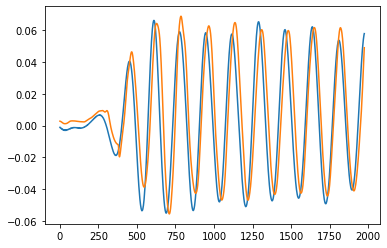

In [12]:
plt.plot(np.arange(0,len(y_train1)),output_data1[test_step:,1],label='Actual')
plt.plot(np.arange(0,len(y_train1)),y_pred_trainset_inv[:,1] , label ='Predicted')